<a href="https://colab.research.google.com/github/alouwyck/vives-intro-to-ai/blob/main/topic8/topic8_intro_ML_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

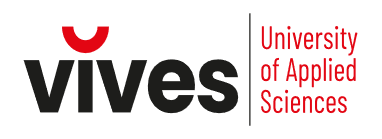<br>


**INTRODUCTION TO ARTIFICIAL INTELLIGENCE**<br>
VIVES BUSINESS ACADEMY<br>
Academic Year 2023-2024<br>
Andy Louwyck

---



---



# **INTRODUCTION TO MACHINE LEARNING WITH PYTHON**

This notebook is a brief introduction to solving machine learning problems with Python. We give some examples of supervised and unsupervised learning:

- classification with K Nearest Neighbors (supervised)
- simple linear regression (supervised)
- classification with logistic regression (supervised)
- K-Means clustering (unsupervised)
- classification with decision trees (supervised)

## Python libraries

We need the following libraries:
- NumPy: library for numerical computation.
- Pandas: library for analyzing structured data
- MatplotLib: library for visualizing data
- Scikit-Learn: machine learning library

We import these libraries using the `import` command. It is customary to give NumPy alias `np` and Pandas alias `pd`. From MatplotLib, we need the `pyplot` module; the convention is to import it as `plt`.

In [ ]:
import numpy as np  # numeric python
import pandas as pd  # python data analysis library
import matplotlib.pyplot as plt  # python library for visualizations
plt.rcParams["figure.dpi"] = 80  # set figure dpi

From Scikit-Learn, TensorFLow and Keras, we import only the classes we use at the time we need them.

## Traditional Programming vs Machine Learning

Let's begin by trying to understand the difference between traditional programming and classical AI on one hand and machine learning on the other. The following picture clearly summarizes it:

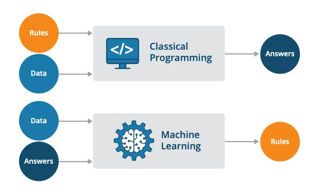

In both cases we have input data. In classical programming and AI, we also know the rules, and if an **algorithm** applies these rules to the input data, then we get the answers or the output. In machine learning, we don't know the rules, also called the **model**. In case of **supervised learning**, however, we know the answers, and the machine learning algorithm will derive the rules from these (input, output) pairs. So, a machine learning algorithm returns a model! That model can be used afterwards like a classical program to **predict** answers on new data.

An example to illustrate this. Suppose we have to write a program that controls the thermostat: when the temperature is lower than 17.5 degrees Celsius, the heating should be on; otherwise, the heating is off. That is very straightforward to implement:

In [ ]:
# threshold
threshold = 17.5
# input
temperature = float(input("What is the temperature? "))
# output
print("Heating is " + ("on" if temperature < threshold else "off"))

That is an example of traditional programming:
- you get the input data: the temperature
- and the rule: if the given temperature is lower than 17.5, then the heating is on, otherwise it is off.
- so your algorithm is able to calculate the output by applying the rule to the input.

In Machine Learning, we do not know the rule, but we get the input and the ouput:

In [ ]:
# input
temperature = [17.1, 15.6, 23.1,  19.8,  12.9, 21.6,  20.3,  18.7]
# corresponding output
heating =     ['on', 'on', 'off', 'off', 'on', 'off', 'off', 'off']
# put in Pandas DataFrame to get a table
df = pd.DataFrame(dict(temperature=temperature,
                       heating=heating))
df

Here the challenge is to derive the rule from these (input, output) pairs. One way to decide whether the heating is on or off given a new temperature, is to simply adopt the output of the closest temperature, called the **nearest neighbor**, which is found by calculating the absolute difference between the given temperature and the temperatures in the dataset and taking the sample having the smallest absolute difference:

> $\min_i{|T_{new} - T_i|}$

where $T_{new}$ is the given temperature and $T_i$ is the $i$-th temperature in the dataset. This nearest neighbor is easily found using Pandas methods `abs()` and `argmin()`:

In [ ]:
# new input
temperature = float(input("What is the temperature? "))
# caculating absolute differences
abs_diff = (df.temperature - temperature).abs()
# getting the row index of the nearest sample in the dataset
irow = abs_diff.argmin()  # argmin returns the index of the minimum
# output
print("Heating is " + df.heating.iloc[irow])

This is an example of a very simple machine learning model. Actually, it is a special case of a well-known machine learning algorithm, called *K Nearest Neighbors*, which we'll discuss in the next section. As the name suggests, this generalized version selects the K nearest neighbors to determine the output of a new sample. Here, we've set K to 1.

It's important to realize the machine learning model sometimes predicts wrong values! Here, for instance, it will predict the heating is off when the temperature is 17.6 because the nearest temperature is 17.1. Therefore, it is imperative to always evaluate a machine learning model to assess its performance. We will also explore this aspect further.

## K Nearest Neighbors

As already indicated in previous section, the "K Nearest Neighbors" algorithms (KNN) are very well-known in machine learning and also have a lot of applications. They can be used in classification, regression, and even unsupervised learning. Here, we only discuss 2 **classification** examples. So we are dealing with **supervised learning**, which implies the data will be labeled.

The "nearest neighbors" principle is quite simple: the algorithm takes the K data points from the training set that are closest to a new data point, and in case of classification, it gives that new data point the label that is most common among the K surrounding data points.

The question is: how does the algorithm find the K nearest data points? The answer is: by calculating the distances between the new data point and the data points in the training set. This can be the Manhattan distance, but very often the Euclidean distance is used, which is the straight-line distance 'as the crow flies' between 2 points.

Considering 2 points with respective coordinates $(x_1, y_1)$ and $(x_2, y_2)$, then the **Manhattan distance** is $m$:

> $m = |x_2 - x_1| + |y_2 - y_1|$.

We find the **Euclidean distance** $d$ by applying the Pythagorean theorem:

> $d = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}$

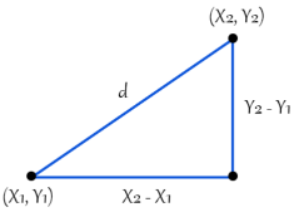

In machine learning, the coordinates are the features, and so the algorithm computes the differences between the features of the data points. To present our results graphically, the data points are restricted here to 2 features $x_1$ and $x_2$, and a label $y$. Of course, the algorithm can also be applied to data points having more than 2 features.

Here, only 2 simple examples are discussed, in each case reading a small data set as a Pandas dataframe, plotting the data points in a scatterplot, and then predicting the class of some new data points. Since this is a classification task, we need to use class `KNeighborsClassifier` from Scikit-Learn:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

Unlike most other machine learning models, there is no training phase in KNN. We have to specify the value for K ourselves (i.e., it is a **hyperparameter**), and so the algorithm does not need to derive any parameters. Therefore, we call this **lazy learning** (in contrast to **eager learning** when there is a training of the model needed).

### Example 1

We start with a dataset containing the height in cm and the weight in kg of 100 biological women and 100 biological men. On average, women are slightly smaller and lighter than men. Can we use this dataset to predict whether a person is a biological male or female based on their height and weight? Let's try that by applying KNN.

We read the csv file `"height_weight_sex.csv"`. Note that this file uses a comma as a separator, so we can just pass the name of the file to Pandas function `read_csv`:

In [ ]:
df = pd.read_csv("height_weight_sex.csv")
df.head()

Using the `head` method, we print out the first 5 records from our dataframe. You can see that a dataframe is simply a table. The columns are the **features**, the rows are the data points or **examples**. In this case, the last column contains the **labels**. To know how many data points are in our dataset, we can just apply function `len` to our `DataFrame` object:

In [ ]:
len(df)  # length of dataframe = number of rows!

The first 5 examples contain data from females. We can see this by the label `'f'`. Males probably get the label `'m'`. Let's check that by calling method `unique` on column `df.sex`:

In [ ]:
df.sex.unique()  # method 'unique' returns unique values

By invoking method `describe` we can retrieve the statistics of the numeric features:

In [ ]:
df.describe()

To know the average height and weight of males and females separately, we can use method `groupby`, just like in SQL:

In [ ]:
df.groupby('sex').mean()  # method mean calculates the average

Indeed, we see that the females in the dataset are, on average, smaller and lighter than the males.

Let's visualize the data in a scatterplot, giving the data points a color based on the labels. We are going to color data points corresponding to men yellow, and data points corresponding to women green:

In [ ]:
_, ax = plt.subplots()
df.loc[df.sex=='m', :].plot.scatter(x='height', y='weight', c='y', ax=ax);  # men: yellow
df.loc[df.sex=='f', :].plot.scatter(x='height', y='weight', c='g', ax=ax);  # women: green
plt.grid()

We see that there are indeed 2 distinct groups. Although there is some overlap between the two groups, they can be separated. So it is possible to predict from this dataset whether someone is female or male when we know their height and weight.

The interface of the `KNeighborsClassifier` class is the same as that of other Scikit-Learn classes. For convenience, we are going to put the features and labels into NumPy arrays `X` and `y`, respectively. However, we still need to convert the labels to integers because the algorithm can only perform calculations using numbers. We do that by replacing label `'f'` by `1` and label `'m'` by `0`:

In [ ]:
X = df[['height', 'weight']].values  # put features height and weight into matrix X
y = (df.sex=="f").values.astype(int)  # convert column df.sex containing the labels to boolean vector y

With NumPy and Pandas, we can perform operations on entire arrays without using loops! These are called *vectorized* expressions.

Now we are ready to apply the KNN algorithm. First, we need to instantiate class `KNeighborsClassifier`. As we explained above, we need to specify K, as it is a **hyperparameter**. We do that by passing input parameter `n_neighbors`, which we set to 5:

In [ ]:
model = KNeighborsClassifier(n_neighbors=5)  # K = 5
model.fit(X, y)

Recall that we do not have to train a model when we apply KNN. As we have to pass our data to the `KNeighborsClassifier` object, we still need to call method `fit`, which is usually invoked to train a model.

We can also evaluate our model by calling method `score`. We are dealing with classification here, so we get the **accuracy** of the model. This is simply the number of correctly classified data points divided by the total number of points:

In [ ]:
model.score(X, y)  # calculates the accuracy

95.5% of the data points are correctly classified by the KNN algorithm!

In case of imbalanced datasets, the accuracy may give a wrong impression of the model's performance. Suppose you want to test if people are infected with COVID. If in reality only 0.1 % of the population is infected, then the following test has an accuracy of 99.9%, although it is useless!

```python
def is_infected(*symptoms):
    return False
```


A **confusion matrix** may give us a better idea of how well the model performs, as it gives an overview of:
- *True Positives* (TP): the number of samples labeled as 1 which have a predicted label of 1;
- *True Negatives* (TN): the number of samples labeled as 0 which have a predicted label of 0;
- *False Positives* (FP): the number of samples labeled as 0 which have a predicted label of 1;
- *False Negatives* (FN): the number of samples labeled as 1 which have a predicted label of 0.

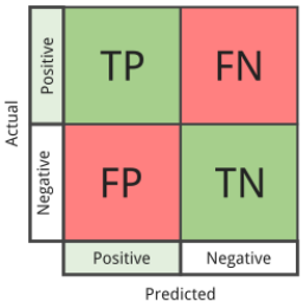

In case of our simple COVID test, we get the following confusion matrix:

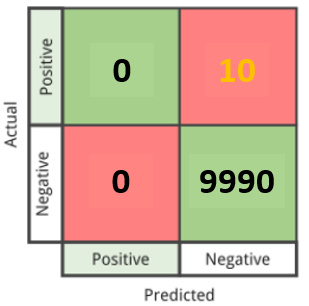

Now we clearly see our test is useless indeed as we cannot identify any of the infected persons! In other words, we have zero True Positives and too much False Negatives!

Using Scikit-Learn, we can easily plot a confusion matrix for our KNN model:

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, X, y,
                                      display_labels=('m', 'f'),  # labels for 0 and 1
                                      colorbar=False);  # no colorbar

That looks good! The dataset is balanced and the TP and TN are very high!

Now let's try to **predict** whether the following persons are biological males or females:
- person of 165 cm and 55 kg
- person of 185 cm and 70 kg
- person of 175 cm and 65 kg

In [ ]:
X_new = np.array([[165, 55],   # person of 165cm and 55kg
                  [185, 70],   # person of 185cm and 70kg
                  [175, 65]])  # person of 175cm and 65kg
model.predict(X_new)

The first 2 persons are pretty clear. However, the third person is questionable. To see why the model chooses "male", we create the scatterplot again, and now add the 3 new data points:

In [ ]:
_, ax = plt.subplots()
df.loc[df.sex=='m', :].plot.scatter(x='height', y='weight', c='y', ax=ax);  # men: yellow
df.loc[df.sex=='f', :].plot.scatter(x='height', y='weight', c='g', ax=ax);  # women: green
plt.plot(X_new[:, 0], X_new[:, 1], 'ro')  # new points are red
plt.grid();

Since we have taken K = 5, the KNN algorithm looks at the 5 points closest to a new point. The third person corresponds to the middle red point. Indeed, of the 5 closest points, 4 are yellow and only 1 is green, so the new point is also given a yellow color, which corresponds to label `'m'`.

### Example 2

In a second example, we are going to predict whether or not a person who is on a social networking site will respond to an ad displayed on that site. In other words, we are going to predict whether a person will purchase the product or ignore the ad. To predict that, we use that person's age and estimated salary.

This is another example of **binary classification**, because we have 2 classes: persons who purchase the product, and persons who do not purchase the product. As it is a classification problem, we can again apply the KNN algorithm.

The dataset we are going to use is stored in file `"Social_Network_Ads.csv"`. Read that file and display the first 5 rows:

Column `"User Id"` contains no information and column `"Gender"` is not going to be used. So the features are `"Age"` and `"EstimatedSalary"`, and the label is `"Purchased"`. Check that that last column is effectively made up of zeros and ones:

Now create a scatterplot and color the points corresponding to persons who purchased the product in green (`'g'`) and the points corresponding to persons who did not purchase the product in red (`'r'`):

Put the **features** in NumPy array `X` and the **labels** in NumPy array `y`:

Now apply the KNN algorithm using K = 3:

What is the model's **accuracy**?

Plot the **confusion matrix**!

Finally **predict** whether or not the following people will buy the product:
- person aged 25 with about 60 000 as salary
- Person aged 40 with about 85 000 as salary
- Person aged 55 with about 100 000 as salary


Redraw the scatterplot and add the new data points in blue (`'b'`). Check if the calculated labels are correct. Recall we took the 3 closest points (K = 3) this time!

## Linear regression

Linear regression is a form of **supervised learning** in which the **target**, i.e., the feature we predict, is a quantitative variable. Moreover, we assume that there is a linear relationship between the other features we use to predict the target.

The simplest form of linear regression is that in which we try to predict a target $y$ using 1 feature $x$. We call this **simple linear regression**. In this case, we can represent the data points in a two-dimensional coordinate system. Applying linear regression then comes down to finding the **best fitting line**.

We know that the general equation of a straight line is:

> $y=mx+b$

To find the best fitting line, we apply an algorithm that derives *slope* $m$ and *intercept* $b$ from the data points $(x_i, y_i)$. Once the values for **parameters** $m$ and $b$ are found, we have a **model** which we can apply to make predictions. We do this by inserting a new value $x$ into the found equation to obtain the prediction $\hat{y}$.

**Prediction** $\hat{y}$ will obviously not equal the true value $y$, but we do know that the difference (or error) between predicted and true value is minimal because the algorithm derives optimal values for $m$ and $b$ by minimizing the errors of all data points in the data set. This minimization of differences, also called the **loss**, is the **training** of the model.

There are several **algorithms** to apply linear regression. And we can also use more than 1 feature $x$ to predict $y$. For example, if we have 2 features $x_1$ and $x_2$, we look for the best fitting plane in a three-dimensional coordinate system. For more than 2 features, we look for a [hyperplane](https://en.wikipedia.org/wiki/Hyperplane) in n-dimensional space. We can also model nonlinear relationships with *polynomial regression*. However, these are all topics that are not within the scope of this course.

In this notebook, we only discuss 2 examples in which we apply simple linear regression. In each example, we first read a dataset as Pandas dataframe, and we visualize the data points in a scatterplot using Matplotlib. Then we use class `LinearRegression` from Scikit-Learn to find the line of best fit and make some predictions with the derived model.

In [ ]:
from sklearn.linear_model import LinearRegression

### Example 1

In the first example, we examine the age of couples. Specifically, we try to predict the wife's age from the husband's age. Intuitively, we could say that, on average, the age of the partners will be the same. How do we express this mathematically?

Since we want to predict the wife's age, this is the target $y$. The husband's age is then feature $x$. Our intuitive model then simply has the following equation:

> $y = x$

Thus, slope $m$ is 1, and intercept $b$ is 0.

Now suppose we were to assume that the wife is on average 1 year younger than the husband, then we get the following model:

> $y = x - 1$

In this case, the parameters $m$ and $b$ are equal to 1 and -1, respectively.

Thus, we can keep guessing the best values for parameters $m$ and $b$. But that is not how we proceed in machine learning. In machine learning we are going to collect data and then run an algorithm on that data to find the best values for our parameters. Let's do that!

We have already collected the data and the dataset is stored in the file `"age_couple.xlsx"`. This is an Excel file, but fortunately, Pandas provides a function `read_excel` that allows us to easily load a table from an Excel file as a `DataFrame`:

In [ ]:
df = pd.read_excel('age_couple.xlsx')
df.head()

Using the `head` method, we print out the first 5 records from our dataframe. Let's check the total number of samples in the dataset:

In [ ]:
len(df)  # length of dataframe = number of rows!

It is seen that we have 25 examples and 3 features. However, column `"Couple"` is just an index from which we cannot get any useful information. So we can ignore that column. The other two columns are the ages of husband and wife. We need those **features**! Let's plot those ages against each other in a scatterplot. We want to predict the wife's age, so this is the **target** and it will be on the y-axis. The x-axis then respresents the age of the husband:

In [ ]:
husband, wife = tuple(df.columns[1:])  # assign column names to variables
df.plot.scatter(x=husband, y=wife)  # make scatter plot using method plot.scatter
y = x = np.linspace(0, 100, 100)
plt.plot(x, y, 'k--')  # diagonal y = x
plt.grid()  # add grid

We also plotted our intuitive model $y=x$ and we see that this is not a bad guess! Wondering which model the machine learning algorithm will derive.... For clarity, we first put feature and target into separate variables, and we convert them to NumPy arrays:

In [ ]:
X = df[husband].values.reshape(-1, 1)  # feature x
y = df[wife].values  # target y

Don't panic if you don't fully understand what's going on here.... This is not a course on programming with Python!

To apply linear regression, we need to instantiate the `LinearRegression` class. Then we `train` the model by calling the `fit` method with variables `X` and `y` as inputs. It is this method that will derive the parameters $m$ and $b$ by **fitting** the data points:

In [ ]:
model = LinearRegression()  # instantiate LinearRegression object
model.fit(X, y)  # training the model = fitting the data points

We can now check how well the algorithm has fit the data points by calling method `score`:

In [ ]:
model.score(X, y)  # calculates the R² score

In case of linear regression, this score is the **coefficient of determination R²**. Discussing how to calculate this score is out of scope. Just know that R² is a number between 0 and 1, and the closer the score is to 1, the better the model is. It is also useful to calculate the mean absolute error (**MAE**), the mean squared error (**MSE**), and the root mean squared error (**RMSE**). To do so, we first have to calculate the predicted values using method `predict`:

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# first get predictions...
yp = model.predict(X)

# ...so we can calculate the scores
print('MAE is', mean_absolute_error(y_true=y, y_pred=yp))
print('MSE is', mean_squared_error(y_true=y, y_pred=yp))
print('RMSE is', mean_squared_error(y_true=y, y_pred=yp, squared=False))  # set squared to False to get RMSE

These scores don't tell us much, so it's easier to understand the R² score, which is very close to 1 here, indicating a good fit!



We can also query our **parameters** $m$ and $b$:

In [ ]:
m, b = model.coef_[0], model.intercept_  # slope m and intercept b
print(f'slope m is {m:.3f}, intercept b is {b:.3f}')

We see that the algorithm derived different values for $m$ and $b$. Let's plot the result:

In [ ]:
X_line = np.linspace(0, 100, 100)
y_line = m * X_line + b  # line of best fit derived by the regression model
df.plot.scatter(x=husband, y=wife)
plt.plot(X_line, X_line, 'k--', X_line, y_line, 'r-')
plt.legend(['data', 'intuitive', 'ML model'])
plt.grid()

So the machine learning model will estimate the wife's age to be slightly lower than her husband's. Let's check that with some new data points. Suppose we have 2 new couples whose husbands are 40 and 80 years old, respectively. Using method `predict` we can now easily predict the age of their wife:

In [ ]:
X_new = np.array([[40],   # husband of age 40
                  [80]])  # husband of age 80
np.round(model.predict(X_new))

The model predicts that the wifes' respective ages (rounded) will be 38 and 76. Are those predictions ok? Well, it is a very small dataset, and so those predictions are not reliable. In practice, it is best to make sure we have a much larger dataset so that we can split it into a training, validation, and testing set. That way we can avoid overfitting and thoroughly evaluate our model.

### Example 2

The second dataset is one from Sweden. It contains for different regions from that country the number of claims submitted to insurance companies, and the total amount they paid out (in 1000 Swedish kronor). Obviously, it is very useful for those insurance companies to be able to predict that amount if they know the new number of claims. An ideal case for applying simple linear regression!

Read in the file `"auto_insurance_sweden.csv"`. This is a csv-file that you can easily read in Pandas with the function `read_csv`. Beware! The file did not use a comma but a semicolon as a separator, so you have to pass an additional input parameter `sep=";"` to the function, in addition to the file name. Assign the `DataFrame` object returned by the function to variable `df`, and print the first 5 lines using method `head`:

How many data points does the dataset contain?

We assign the column names to variables:

Making a scatterplot of the data:

Convert **feature** and **target** to NumPy arrays, and put them into variables `X` and `y`, respectively:

Applying simple linear regression:

Calculating the **R² score**:

Assigning the **parameters** to variables `m` and `b`:

Creating again the scatterplot and adding the derived regression line:

What will be the total amount the insurance companies will have to pay out if there are 80, 100 and 140 claims?

## Logistic regression

Although logistic regression can be seen as a regression technique for binary targets, as the name suggests, it is actually used for solving **binary classification** problems. It is also a linear model, so the `LogisticRegression` class is imported from Scikit-Learn's `linear_model` module:

In [ ]:
from sklearn.linear_model import LogisticRegression

Here we will apply logistic regressoin to two datasets consisting of two features and one target. In this way we will be able to visualize the **separating straight line** derived by the logistic regression algorithm on a 2D plot. But just like linear regression, logistic regression may also be applied to solve n-dimensional problems in which case the algorithm finds a separating *hyperplane*.

### Example 1

Let's start again with the dataset containing the height in cm and the weight in kg of 100 biological women and 100 biological men. We assign the **features** to NumPy array `X` and the **labels** to NumPy vector `y` after converting them to integers:

In [ ]:
df = pd.read_csv("height_weight_sex.csv")
X = df[['height', 'weight']].values  # put features height and weight into matrix X
y = (df.sex=="f").values.astype(int)  # convert column df.sex containing the labels to boolean vector y

The interface of class `LogisticRegression` is the same as for the other two Scikit-Learn classes we've already discussed:

In [ ]:
model = LogisticRegression(penalty=None)
model.fit(X, y)

Note that we set `penalty` to `None` as we don't want any regularization, which are techniques to overcome overfitting.

The model's **accuracy** is 96%, which is slightly better than that of the KNN model:

In [ ]:
model.score(X, y)

The **confusion matrix**:

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, X, y,
                                      display_labels=('m', 'f'),  # labels for 0 and 1
                                      colorbar=False);  # no colorbar

The **predictions** for the three new persons that do not belong to the trainingset:

In [ ]:
X_new = np.array([[165, 55],   # person of 165cm and 55kg
                  [185, 70],   # person of 185cm and 70kg
                  [175, 65]])  # person of 175cm and 65kg
model.predict(X_new)

In fact, the logistic regression model predicts the **probability** that a sample belongs to class `1`:

In [ ]:
p = model.predict_proba(X_new)  # returns the probabilities
np.round(p, 2)  # round to two decimals

The first and second column is the probability that the sample has label `0` and `1`, respectively. The total probability, which is the sum of the rows, is equal to 1, because there is a 100% probability that a sample belongs to either class `0` or `1`. To predict the label of a sample, we simply select the column having the largest probability. And that is exactly what method `predict` does!

It's interesting to see that the logistic regression model predicts the third person to be female, while the KNN model predicted this person to be male, although the probabilities are very close to 50%, which implies the model is not very sure. To see why, let's create the scatterplot again, add the 3 new data points, and plot the separating straight line derived by the logistic regression model.

First we need the **parameters**. In this case, there are two **weights** and an intercept, also called **bias**:

In [ ]:
w, b = model.coef_[0].flatten(), model.intercept_.item()  # weights w and bias b
w, b

Why are there two weights here? Well, because there are two features: height and weight. Once we have the weights and the bias, it is possible to add the separating line to the scatter plot. We will not go into the mathematical details as this is not within the scope of this course.

In [ ]:
_, ax = plt.subplots()
df.loc[df.sex=='m', :].plot.scatter(x='height', y='weight', c='y', ax=ax);  # men: yellow
df.loc[df.sex=='f', :].plot.scatter(x='height', y='weight', c='g', ax=ax);  # women: green
plt.plot(X_new[:, 0], X_new[:, 1], 'ro')  # new points are red

# adding the separating straight line in red
xline = np.linspace(150, 200, 2)
yline = -xline * w[0] / w[1] - b / w[1]
plt.plot(xline, yline, 'r-');

plt.ylim((50, 90))
plt.grid()

As we see, the third person, which is represented by the middle red dot, is very close to the separating line, but it is on the "female" side indeed!

### Example 2

Let's try out logistic regression on the social media dataset `"Social_Network_Ads.csv"`. We read the csv-file and assign the **features** to NumPy array `X` and the **labels** to NumPy vector `y`:

In [ ]:
df = pd.read_csv("Social_Network_Ads.csv")
X = df[['Age', 'EstimatedSalary']].values
y = df.Purchased.values.astype(int)

And we apply logistic regression:

In [ ]:
model = LogisticRegression(penalty=None)
model.fit(X, y)

We calculate the model's **accuracy** and plot the **confusion matrix**:

In [ ]:
model.score(X, y)

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, X, y, colorbar=False);

That's not looking good at all! The model always predicts 0, which explains its low accuracy of 64.25%. That something went wrong is even more clear when we calculate the **recall**, the **precision**, and the **F1-score**, which are all equal to zero, as there are on true positives:

In [ ]:
from sklearn.metrics import recall_score, precision_score, f1_score

# first get the predictions...
yp = model.predict(X)

# ...so we can calculate the scores
print("Recall is", recall_score(y_true=y, y_pred=yp))
print("Precision is", precision_score(y_true=y, y_pred=yp))
print("F1-score is", f1_score(y_true=y, y_pred=yp))

Probably the problem is caused by the second feature, the estimated salary, which has very high values. To fix this issue, we divide the values of this feature by 1000:

In [ ]:
X[:, 1] = X[:, 1] / 1000

[**Feature scaling**](https://en.wikipedia.org/wiki/Feature_scaling) or **normalization** is a very common and important technique because many machine learning algorithms perform much better on small values, especially neural nets!

Let's apply the logistic regression algorithm again and calculate the accuracy of the resulting model:

Checking the confusion matrix:

Let's **predict** the purchase behavior of the three new persons:

- person aged 25 with about 60 000 as salary
- Person aged 40 with about 85 000 as salary
- Person aged 55 with about 100 000 as salary


Finally, let's visualizing the result by adding the separating line and the new data points to the scatter plot:

## K-Means clustering

In the previous examples on classification, datasets were labeled. Specifically, there was a column in the dataframe that indicated to which class a data point belonged. However, labeling datasets is time-consuming, so it would be useful if we could leave that to an algorithm. And those algorithms exist! We call them clustering algorithms as they divide the data into **clusters** by themselves! So they are often applied for *preprocessing* the data.

In this notebook, we demonstrate one of the best-known clustering algorithms: K-Means clustering. The idea behind this algorithm is as follows. The algorithm randomly chooses K points, which we call **centroids**, because it is going to place each of those points at the center of one of the K clusters. How does the algorithm do that? First, it calculates the distance of all the points to the centroids, and it assigns each point to the cluster with the centroid it is closest to. Then it moves each centroid to the center of its own cluster. It then recalculates the distances between all the data points and the new centroids, reassigns the data points to the clusters, and recalculates the position of the centroids. The algorithm keeps repeating this until the centroids stop moving and the data points are in their final cluster.

As an example, we apply K-Means clustering to the datasets from the section on K Nearest Neighbors. We use the class `KMeans` from Scikit-Learn for this purpose:

In [ ]:
from sklearn.cluster import KMeans

So this time we are not going to use the column containing the labels, but let the algorithm divide the data into groups in an "**unsupervised**" way. We only have to specify the number of clusters K. So, as with KNN, this is a **hyperparameter**. We can also choose the distance measure. As usual, we apply the **Euclidean distance**.

### Example 1

We again read the dataset `"height_weight_sex.csv"` and plot the data points in a scatterplot. Since we will not use the labels in column `"sex"`, we give all the points the same color:

In [ ]:
df = pd.read_csv("height_weight_sex.csv")
df.plot.scatter(x='height', y='weight')
plt.grid()

We only need the **features** `"height"` and `"weight"`. We convert these again to a NumPy array `X`:

In [ ]:
X = df[['height', 'weight']].values

To apply the K-means algorithm, we need to instantiate class `KMeans`. We have to specify the number of clusters K by passing input parameter `n_clusters`. We know that there are 2 classes, so we specify 2 as the input argument. The algorithm randomly determines the initial position of the 2 centroids, and so it uses a random number generator. By setting input parameter `random_state` we can specify the seed of that generator (although we are not allowed to do that when solving real-world problems!):

In [ ]:
model = KMeans(n_clusters=2, random_state=20)  # K = 2
model.fit(X)  # only pass X!

Remarkably, we only need to pass array `X` with features to method `fit`, and no array `y` with labels, because it is an **unsupervised learning** algorithm!

Now if we want to know the labels, we can pass `X` to method `predict`:

In [ ]:
yp = model.predict(X)  # predicted labels

Attention! The algorithm may have given the classes a different id, because it does not know the ids used in the dataset! To check that, we extract the labels from the dataset, assign them to variable `y`, and calculate the accuracy:

In [ ]:
y = (df.sex=="f").values.astype(int)  # de real labels
(y == yp).sum() / len(y)  # accuracy = number of correct predictions divided by total number of data points

96% of the labels are predicted correctly. Had we gotten 4% as the result, we had to flip the labels as follows:

```python
b = yp == 1
yp[b] = 0
yp[~b] = 1
```

Now let's predict again whether the 3 new individuals with known height and weight are male or female:

In [ ]:
X_new = np.array([[165, 55],   # person of 165cm and 55kg
                  [185, 70],   # person of 185cm and 70kg
                  [175, 65]])  # person of 175cm and 65kg
model.predict(X_new)

The third person now belongs to the cluster with women! To see why, we again create a scatterplot showing the 3 new data points. To do that effeciently, we add the predicted labels to the data frame:

In [ ]:
df['prediction'] = np.array(['m', 'f'])[yp]  # 'm' is 0 and 'f' is 1
df.head()

We now make 2 scatterplots: in the left plot the data points are colored according to the true labels, and in the right plot according to the clusters:

In [ ]:
_, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True)
df.loc[df.sex=='f', :].plot.scatter(x='height', y='weight', c='g', ax=ax1)
df.loc[df.sex=='m', :].plot.scatter(x='height', y='weight', c='y', ax=ax1)
ax1.plot(X_new[:, 0], X_new[:, 1], 'ro')
ax1.set_title("true labels")
ax1.grid()
df.loc[df.prediction=='f', :].plot.scatter(x='height', y='weight', c='g', ax=ax2)
df.loc[df.prediction=='m', :].plot.scatter(x='height', y='weight', c='y', ax=ax2)
ax2.plot(X_new[:, 0], X_new[:, 1], 'ro')
ax2.set_title("cluster labels")
ax2.grid()

The third person is represented by the middle red point. On the right plot, we see that the 2 clusters do not overlap, and that this point is still inside the cluster with green points indeed!

### Example 2

Now try K-means clustering yourself on the dataset `"Social_Network_Ads.csv"`. Read the file and create a scatterplot without considering the labels:

Put the columns with **features** `"Age"` and `"EstimatedSalary"` into NumPy array `X`:

Apply K-means with K = 2:

Let the model **predict** the labels for the points in the dataset:



Calculate the accuracy by comparing the predicted labels with the true labels:

Now predict again whether or not the following people will buy the product:
- person aged 25 with about 60 000 as a salary
- Person aged 40 with about 85 000 as salary
- Person aged 55 with about 100 000 as salary

Add the predictions to the data frame in a new column `"Prediction"`:

Create a scatterplot showing the true labels and the cluster labels. Also add the new data points to the plots:

## Decision trees

Decision trees are very popular machine learning and data mining methods with a high **interpretability**, also called **explainability**. Unlike many other machine learning models, decision tree models are no "black boxes" indeed, as they can be explained in a way that "makes sense" to a human being at an acceptable level. Moreover, they can be used as graphical tools that may facilitate decision-making.

Decision trees can be used to solve classification and regression problems, and they can also be applied for unsupervised learning. Here, we will only discuss **classification** problems, and the resulting decision tree is therefore called a classification tree.

Using Scikit-Learn, we have to import the `DecisionTreeClassifier` class. We also import function `plot_tree` to plot the decision trees we've trained, and we need the `OrdinalEncoder` class to convert the categorical values into integers:

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import OrdinalEncoder

A decision tree is sometimes also referred to as a *feature tree*, because the internal nodes are labeled with a feature. Each node is split based on the different values the feature can take on in that node, whereas each leaf of the tree represents a prediction. This may sound quite abstract, so let's discuss two examples.

### Example 1

A very famous example is the "play tennis" decision tree. The corresponding dataset is stored in file `'play.txt'`, which can be read using Pandas function `read_csv`. Here, the separator is a space:

In [ ]:
df = pd.read_csv('play.txt', sep=' ').iloc[:, :-1]  # last column is empty, so we don't need it...
df

We don't need the `"Day"` attribute as it doesn't contain any useful information; it's just an id. The **features** are attributes `"Outlook"`, `"Temperature"`, `"Humidity"`, and `"Wind"`. The **labels** are in column `"Play"`:

In [ ]:
features = df[['Outlook', 'Temperature', 'Humidity', 'Wind']]
labels = df[['Play']]

Just like most other machine learning algorithm, the decision tree algorithm implemented in Scikit-Learn is not capable of dealing with string values. So we will **encode** the feature values, which means that we will transform the strings into integer values. We do that by applying the `OrdinalEncoder` class:

In [ ]:
feature_encoder = OrdinalEncoder()
feature_encoder.fit(features)
X = feature_encoder.transform(features)
print(X)

We see that each string is converted to an integer indeed. To know which integer corresponds to which string, we can use the following function:

In [ ]:
def get_feature_value(encoder, feature, id):
    icol = np.where(encoder.feature_names_in_ == feature)[0][0]
    return encoder.categories_[icol][id]

For instance, what does id `2` stands for in the second column, corresponding to the `"Temperature"`?

In [ ]:
get_feature_value(feature_encoder, "Temperature", 2)

We can do the same for the labels, in which case we'll get zeros and ones:

In [ ]:
label_encoder = OrdinalEncoder()
label_encoder.fit(labels)
y = label_encoder.transform(labels)

print("0 is", get_feature_value(label_encoder, "Play", 0))
print("1 is", get_feature_value(label_encoder, "Play", 1))

Now we are ready to **train** a decision tree model. As usual, we instantiate the `DecisionTreeClassifier` and we invoke the `fit` method. We also calculate the accuracy by calling method `score`:

In [ ]:
model = DecisionTreeClassifier()
model.fit(X, y)
model.score(X, y)

An score of 100% is perfect! Let's plot the resulting decision tree using function `plot_tree`:

In [ ]:
plot_tree(model,
          feature_names=feature_encoder.feature_names_in_,
          class_names=label_encoder.categories_[0],
          impurity=False, filled=True, fontsize=8, rounded=True);

The four leaves at the deepest level only have 1 sample. That explains why we get an accuracy of 100%: the tree has "memorized" the samples. This is an example of **overfitting**: the model is too specific! To overcome this, we change the hyperparameter that determines the maximum depth of the tree and set it to 2:

In [ ]:
model = DecisionTreeClassifier(max_depth=2)  # limit the depth of the tree by setting max_depth to 2
model.fit(X, y)
model.score(X, y)

Now we have 85.7% **accuracy**. Let's plot the **confusion matrix**:

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, X, y,
                                      display_labels=('No', 'Yes'),  # labels for 0 and 1
                                      colorbar=False);  # no colorbar

Two samples are being misclassified by this model. Let's visualize the resulting decision tree:

In [ ]:
out = plot_tree(model,
                feature_names=feature_encoder.feature_names_in_,
                class_names=label_encoder.categories_[0],
                impurity=False, filled=True, fontsize=8, rounded=True);

# convert the integers back to strings - this for loop only works for this tree!
for i in [0, 2]:
    out[i].set_text(out[i].get_text().replace("<= 0.5", feature_encoder.categories_[i][0]))

How do we have to apply this decision tree?
- We start with the root node. Is feature "Outlook" equal to "Overcast"?
  - If yes, then we go to the child node on the left, which is a leaf. 4 samples have value "Overcast" and in this case we predict "Yes", which means we will play tennis.
  - If no, then we go to the child node on the right. Here we have to check feature "Humidity". Is it "High"?
    - If yes, then we go to the left and we predict "No", which means we won't play tennis.
    - If no, then we go to the right and we predict "Yes".

What does "samples" and "value" mean? The first indicates how many samples are left in the node. In the root node, for instance, there are 14 samples, which is the complete dataset. In the child node on the right (in white color), there are 10 samples left, as the other child node on the left deals with the 4 "Overcast" samples. The first element of the "value" attribute indicates how many of the samples have label `0` (or "No"), while the second element indicates how many samples have label `1` (or "Yes"). The "class" corresponds to the highest number of labels. In the root node, for instance, there are 5 samples with label `0` and the other 9 samples have label `1`. So the class representing the majority of the labels is "Yes". If a node is a leaf, then this class is the predicted value in that node.

Suppose now we want to predict whether or not it is a good idea to play tennis when the outlook is overcast, the temperature is cool, and when there is high humidity and strong wind, then we have to create a new Pandas dataframe containing this new data point:

In [ ]:
new = pd.DataFrame(dict(Outlook=['Overcast'],
                        Temperature=['Cool'],
                        Humidity=['High'],
                        Wind=['Strong'],
                        Play=['????']))
new

Of course, we have to encode this new sample by applying the `feature_encoder` we defined earlier for the trainingdata:

In [ ]:
Xnew = feature_encoder.transform(new[['Outlook', 'Temperature', 'Humidity', 'Wind']])

Now we can make a **prediction** for this new data point:

In [ ]:
model.predict(Xnew)

It returns `1`, which corresponds to "Yes":

In [ ]:
get_feature_value(label_encoder, "Play", 1)

A final remark about the resulting decision tree. The Scikit-Learn algorithm is capable of deriving *binary* trees only, which means the maximum number of child nodes is two. If there would be more than two child nodes allowed, then in this example it would be better to split the root node into three branches, which would result in the following tree of depth 2:

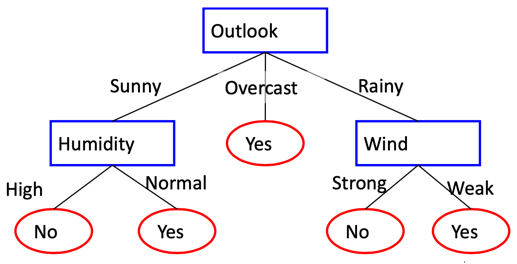

### Example 2

Consider the following "cocktail" dataset, indicating which cocktails make us happy or sick:

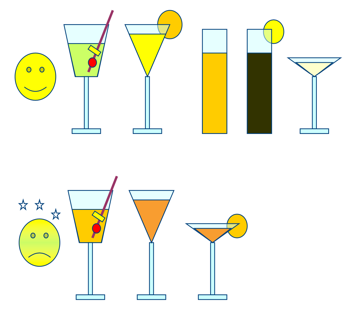

Let's turn this dataset into a Pandas dataframe:

In [ ]:
df = pd.DataFrame(columns=["shape", "foot", "color", "lemon", "stirrer", "sick"],
                  data=[["trapezium", "yes", "other", "no", "yes", "no"],
                        ["triangle", "yes", "other", "yes", "no", "no"],
                        ["rectangle", "no", "orange", "no", "no", "no"],
                        ["rectangle", "no", "other", "yes", "no", "no"],
                        ["triangle", "yes", "other", "no", "no", "no"],
                        ["trapezium", "yes", "orange", "no", "yes", "yes"],
                        ["triangle", "yes", "orange", "no", "no", "yes"],
                        ["triangle", "yes", "orange", "yes", "no", "yes"]])
df

The **features** are the `"color"` of the cocktail, the `"shape"` of the glass and whether or not it has a `"foot"`, a `"lemon"` and a `"stirrer`. The **labels** which we want to predict are in column `"sick"`.

The first 'preprocessing' step is **encoding** these features and labels:

The second step is **training** the decision tree model and calculating the **accuracy**:

Let's plot the tree:

Let's figure out whether we will get sick if we try this new cocktail:

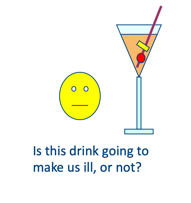

We create a Pandas dataframe containing this new data example:

We encode the new data point:

And we predict whether or not we'll get sick:


---



---
## SOURCES

* Scikit-Learn User Guide: https://scikit-learn.org/stable/user_guide.html
* Serrano, L. G., 2020. Grokking Machine Learning (Version 12), Manning Early Access Program, Manning Publications, 500p.
* Chollet, F., 2021. Deep Learning with Python, 2nd edition, Manning Publications, 478p.

---